In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementing Linear Regression algo

In [2]:
def linear_regression(x_train, y_train):
    # Add a column of ones to x_train for the intercept term
    x_train = np.column_stack((np.ones(len(x_train)), x_train))
    
    # Calculate the coefficients using the normal equation
    coefficients = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train
    
    # Predict the output values
    y_pred = x_train @ coefficients
    
    return coefficients, y_pred


## Reading data from local machine

In [3]:
# Load the Iris dataset from a CSV file
df = pd.read_csv('iris.csv')

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocessing

In [5]:
# Preprocessing: Extract the features and output
x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y_train = df['Species'].values

In [6]:
# Preprocessing: Convert the categorical output to numerical values
y_train = np.where(y_train == 'Iris-setosa', 0, np.where(y_train == 'Iris-versicolor', 1, 2))

## Training the Model

In [7]:
# Train the linear regression model
coefficients, y_pred = linear_regression(x_train, y_train)

In [8]:
# Print the coefficients
print("Coefficients:", coefficients)

Coefficients: [ 0.19208399 -0.10974146 -0.04424045  0.22700138  0.60989412]


## Visualization: Line plot of the actual output vs. predicted output

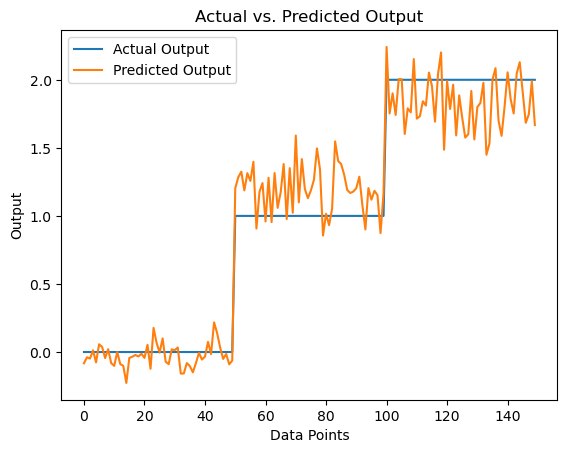

In [9]:
# Visualization: Line plot of the actual output vs. predicted output
plt.plot(y_train, label='Actual Output')
plt.plot(y_pred, label='Predicted Output')
plt.xlabel('Data Points')
plt.ylabel('Output')
plt.title('Actual vs. Predicted Output')
plt.legend()
plt.show()